In [10]:
import numpy as np
np.random.binomial(1, 0.10, 10)
conversion_rate = control.mean()
conversion_rate
control = np.random.binomial(1, 0.10, 1000)
control.mean()

np.float64(0.099)

In [12]:
import numpy as np

control = np.random.binomial(1, 0.10, 1000)
treatment = np.random.binomial(1, 0.13, 1000)

print("Control rate:", control.mean())
print("Treatment rate:", treatment.mean())

Control rate: 0.111
Treatment rate: 0.115


In [14]:
from statsmodels.stats.proportion import proportions_ztest

# Count conversions (successes)
success_control = control.sum()      # my result: 104 conversions
success_treatment = treatment.sum()   # my result: 113 conversions

# Total users in each group
n_control = 1000
n_treatment = 1000

# Prepare data for the test
successes = [success_control, success_treatment]
samples = [n_control, n_treatment]

# Perform z-test (alternative='larger' means I'm testing if treatment > control)
z_stat, p_value = proportions_ztest(successes, samples, alternative='larger')

print("=" * 50)
print(" A/B TEST RESULTS")
print("=" * 50)
print(f"Control group conversions: {success_control}/{n_control} ({success_control/n_control*100:.1f}%)")
print(f"Treatment group conversions: {success_treatment}/{n_treatment} ({success_treatment/n_treatment*100:.1f}%)")
print(f"Observed difference: {(success_treatment/n_treatment - success_control/n_control)*100:.2f} percentage points")
print("-" * 50)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("-" * 50)

# Interpretation
if p_value < 0.05:
    print("✅ RESULT: Statistically significant! (p < 0.05)")
    print("   The treatment appears to have a REAL positive effect.")
    print("   We reject the null hypothesis.")
else:
    print("❌ RESULT: Not statistically significant (p ≥ 0.05)")
    print("   The difference could be due to RANDOM CHANCE.")
    print("   We fail to reject the null hypothesis.")
print("=" * 50)

 A/B TEST RESULTS
Control group conversions: 111/1000 (11.1%)
Treatment group conversions: 115/1000 (11.5%)
Observed difference: 0.40 percentage points
--------------------------------------------------
Z-statistic: -0.2825
P-value: 0.6112
--------------------------------------------------
❌ RESULT: Not statistically significant (p ≥ 0.05)
   The difference could be due to RANDOM CHANCE.
   We fail to reject the null hypothesis.


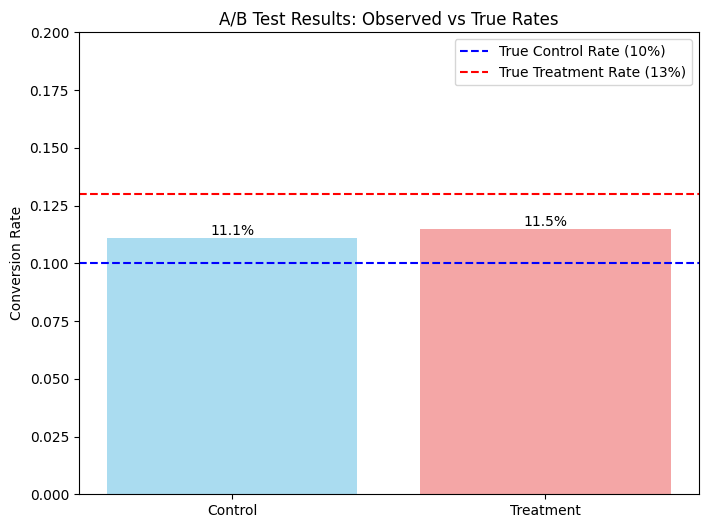

P-value: 0.6112
Conclusion: Not significant


In [15]:
import matplotlib.pyplot as plt

# Create simple bar chart
groups = ['Control', 'Treatment']
rates = [control.mean(), treatment.mean()]
colors = ['skyblue', 'lightcoral']

plt.figure(figsize=(8, 6))
bars = plt.bar(groups, rates, color=colors, alpha=0.7)
plt.axhline(y=0.10, color='blue', linestyle='--', label='True Control Rate (10%)')
plt.axhline(y=0.13, color='red', linestyle='--', label='True Treatment Rate (13%)')
plt.ylim(0, 0.20)
plt.ylabel('Conversion Rate')
plt.title('A/B Test Results: Observed vs True Rates')
plt.legend()

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}', ha='center', va='bottom')

plt.show()

print(f"P-value: {p_value:.4f}")
print(f"Conclusion: {'Not significant' if p_value >= 0.05 else 'Significant'}")

In [22]:
 #A/b Test with 10,000 users per group
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

print("=" *50)
print("A/B TEST WITH 10,000 USERS PER GROUP")
print( "=" *50)

# 1 Simulating larger groups
control_big = np.random.binomial(1, 0.10, 10000)
treatment_big = np.random.binomial(1, 0.13,10000)

# 2. calculate the conversion rates
control_rate_big = control_big.mean()
treatment_rate_big = treatment_big.mean()
difference_big = (treatment_rate_big - control_rate_big) * 100

print(f"Control rate: {control_rate_big*100:.2f}%")
print(f"Treatment rate: {treatment_rate_big*100:.2f}%")
print(f"Difference: {difference_big:.2f} percentage points")
print("-" * 50)

# 3. Count Success
success_control_big = control_big.sum()
success_treatment_big = treatment_big.sum()

print(f"Control conversions: {success_control_big}/10000")
print(f"Treatment conversions: {success_treatment_big}/10000")
print("-" * 50)

# 4. Perform Statistical test
successes_big = [success_treatment_big, success_control_big]
samples_big = [10000, 10000]

z_stat_big, p_value_big = proportions_ztest(successes_big, samples_big, alternative = 'larger')

print(f"Z-statistic: {z_stat_big:.4f}")
print(f"P-value: {p_value_big:.6f}")
print("-" *50)

# 5. Interprete Result
if p_value_big < 0.05:
    print(" Result: statistically sugnificant!")
    print(" with 10,000 users, we detected the real effect.")
else:
    print(" Result:Not statistically significant")
    print(" Even 10,000 users wasn't enough!")
print("=" * 50)






A/B TEST WITH 10,000 USERS PER GROUP
Control rate: 9.93%
Treatment rate: 13.12%
Difference: 3.19 percentage points
--------------------------------------------------
Control conversions: 993/10000
Treatment conversions: 1312/10000
--------------------------------------------------
Z-statistic: 7.0639
P-value: 0.000000
--------------------------------------------------
 Result: statistically sugnificant!
 with 10,000 users, we detected the real effect.
